### Source: 
http://www.gregreda.com/2015/08/23/cohort-analysis-with-python/

Dataset Needed: D:\Code\pcsg_test\relay-foods.xlsx

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline
df = pd.read_excel('relay-foods.xlsx')

In [2]:
# Create a period column based on the OrderDate
df['OrderPeriod'] = df.OrderDate.apply(lambda x: x.strftime('%Y-%m'))
df.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


## 2. Determine the user's cohort group (based on their first order)

Create a new column called CohortGroup, which is the year and month in which the user's first purchase occurred.

In [3]:
df.set_index('UserId', inplace=True)

df['CohortGroup'] = df.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)
df.head()

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [4]:
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

cohorts = grouped.agg({'UserId': pd.Series.nunique,
                      'OrderId': pd.Series.nunique,
                      'TotalCharges': np.sum})

cohorts.rename(columns={'UserId': 'TotalUsers',
                       'OrderId': 'TotalOrders'},
              inplace=True)

cohorts.head(10)

TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeriod                                       
2009-01     2009-01              22           30     1850.2550
            2009-02               8           25     1351.0650
            2009-03              10           26     1357.3600
            2009-04               9           28     1604.5000
            2009-05              10           26     1575.6250
            2009-06               8           26     1384.8400
            2009-07               8           24     1750.8400
            2009-08               7           21     1426.5714
            2009-09               7           24     1964.2755
            2009-10               7           13      860.3292

### 4. Label the CohortPeriod for each CohortGroup
We want to look at how each cohort has behaved in the months following their first purchase, so we'll need to *index each cohort to their first purchase month.* For example, CohortPeriod = 1 will be the cohort's first month, CohortPeriod = 2 is their second, and so on.

This allows us to compare cohorts across various stages of their lifetime.

In [5]:
cohorts_2 = cohorts.groupby(level=1)

for key, item in cohorts_2:
    print(cohorts_2.get_group(key), '\n\n')

                         TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeriod                                       
2009-01     2009-01              22           30      1850.255 


                         TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeriod                                       
2009-01     2009-02               8           25      1351.065
2009-02     2009-02              15           15       666.310 


                         TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeriod                                       
2009-01     2009-03              10           26       1357.36
2009-02     2009-03               3            8        501.61
2009-03     2009-03              13           18        806.31 


                         TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeriod                                       
2009-01     2009-04               9           28       1604.50
2009-02     2009-04               5           

In [6]:
cohorts_2.describe()

TotalUsers                                                         \
                 count       mean        std   min    25%   50%    75%    max   
OrderPeriod                                                                     
2009-01            1.0  22.000000        NaN  22.0  22.00  22.0  22.00   22.0   
2009-02            2.0  11.500000   4.949747   8.0   9.75  11.5  13.25   15.0   
2009-03            3.0   8.666667   5.131601   3.0   6.50  10.0  11.50   13.0   
2009-04            4.0  14.250000  16.640813   4.0   4.75   7.0  16.50   39.0   
2009-05            5.0  15.800000  19.664689   1.0   5.00  10.0  13.00   50.0   
2009-06            6.0  11.833333  10.476959   4.0   5.00   9.0  12.25   32.0   
2009-07            7.0  14.714286  16.347419   1.0   6.00  12.0  14.00   50.0   
2009-08            8.0  10.875000  10.384570   2.0   4.75   6.5  12.50   31.0   
2009-09            9.0  10.222222  10.592188   2.0   5.00   7.0  11.00   37.0   
2009-10           10.0  12.000000  15.151091   3.0   5.25   7.0   9.75   54.0   
2009-11           11.0  18.727273  37.197018   2.0   4.50   7.0  12.50  130.0   
2009-12           12.0  12.916667  18.347446   1.0   3.00   7.0  10.50   65.0   
2010-01           13.0  16.307692  24.570933   3.0   4.00  11.0  13.00   95.0   
2010-02           14.0  18.642857  26.771417   2.0   4.25   8.0  16.75  100.0   
2010-03           14.0   9.285714   8.137554   1.0   3.25   7.0  11.75   26.0   

            TotalOrders                                                  \
                  count       mean        std   min    25%   50%    75%   
OrderPeriod                                                               
2009-01             1.0  30.000000        NaN  30.0  30.00  30.0  30.00   
2009-02             2.0  20.000000   7.071068  15.0  17.50  20.0  22.50   
2009-03             3.0  17.333333   9.018500   8.0  13.00  18.0  22.00   
2009-04             4.0  25.750000  24.143667   6.0   9.00  19.0  35.75   
2009-05             5.0  29.400000  24.815318   2.0  16.00  26.0  35.00   
2009-06             6.0  23.333333  11.325487   9.0  16.00  25.5  26.00   
2009-07             7.0  26.142857  21.782474   4.0  14.50  23.0  28.00   
2009-08             8.0  19.875000  16.753997   6.0   8.50  12.5  25.75   
2009-09             9.0  20.444444  11.737878   7.0  13.00  14.0  28.00   
2009-10            10.0  21.700000  19.994722   7.0   9.50  14.0  23.25   
2009-11            11.0  28.727273  46.679955   4.0   7.00  14.0  24.50   
2009-12            12.0  23.500000  27.586228   3.0   5.00  15.0  23.25   
2010-01            13.0  31.000000  40.767634   5.0   7.00  19.0  29.00   
2010-02            14.0  34.285714  39.867914   7.0   9.75  19.0  29.50   
2010-03            14.0  11.071429   9.093229   1.0   3.50   9.0  15.75   

                   TotalCharges                                       \
               max        count         mean          std        min   
OrderPeriod                                                            
2009-01       30.0          1.0  1850.255000          NaN  1850.2550   
2009-02       25.0          2.0  1008.687500   484.194904   666.3100   
2009-03       26.0          3.0   888.426667   433.744597   501.6100   
2009-04       59.0          4.0  1399.582500   904.201719   463.8000   
2009-05       68.0          5.0  1310.867000   927.480661    53.3600   
2009-06       41.0          6.0  1137.083333   292.627039   758.5200   
2009-07       71.0          7.0  1168.312857   872.082357   161.2500   
2009-08       51.0          8.0  1094.908437   815.319483   314.1752   
2009-09       44.0          9.0  1199.260789   627.944512   415.5969   
2009-10       70.0         10.0  1196.233960  1122.614443   209.4465   
2009-11      166.0         11.0  1550.156845  1838.081631   182.9100   
2009-12       88.0         12.0  1619.879492  1693.871515   147.3250   
2010-01      156.0         13.0  2171.225969  2604.831968   223.5689   
2010-02      139.0         14.0  2385.038793  2472

In [7]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  TotalOrders  TotalCharges  CohortPeriod
CohortGroup OrderPeriod                                                     
2009-01     2009-01              22           30      1850.255             1
            2009-02               8           25      1351.065             2
            2009-03              10           26      1357.360             3
            2009-04               9           28      1604.500             4
            2009-05              10           26      1575.625             5

### 5. Make sure we did all that right
Let's test data points from the original DataFrame with their corresponding values in the new cohorts DataFrame to make sure all our data transformations worked as expected. As long as none of these raise an exception, we're good.

x = df[(df.CohortGroup == '2009-01') & (df.OrderPeriod == '2009-01')]
y = cohorts.loc[('2009-01', '2009-01')]

assert(x['UserId'].nunique() == y['TotalUsers'])
assert(x['TotalCharges'].sum().round() == y['TotalCharges'].round())
assert(x['OrderId'].nunique() == y['TotalOrders'])

x = df[(df.CohortGroup == '2009-01') & (df.OrderPeriod == '2009-09')]
y = cohorts.loc[('2009-01', '2009-09')]

assert(x['UserId'].nunique() == y['TotalUsers'])
assert(x['TotalCharges'].sum().round() == y['TotalCharges'].round())
assert(x['OrderId'].nunique() == y['TotalOrders'])

x = df[(df.CohortGroup == '2009-05') & (df.OrderPeriod == '2009-09')]
y = cohorts.loc[('2009-05', '2009-09')]

assert(x['UserId'].nunique() == y['TotalUsers'])
assert(x['TotalCharges'].sum().round() == y['TotalCharges'].round())
assert(x['OrderId'].nunique() == y['TotalOrders'])

### User Retention by Cohort Group
We want to look at the percentage change of each CohortGroup over time -- not the absolute change.

To do this, we'll first need to create a pandas Series containing each CohortGroup and its size.

In [9]:
#  reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2009-01    22
2009-02    15
2009-03    13
2009-04    39
2009-05    50
Name: TotalUsers, dtype: int64

Now, we'll need to divide the TotalUsers values in cohorts by cohort_group_size. Since DataFrame operations are performed based on the indices of the objects, we'll use unstack on our cohorts DataFrame to create a matrix where each column represents a CohortGroup and each row is the CohortPeriod corresponding to that group.

To illustrate what unstack does, recall the first five TotalUsers values:

In [10]:
cohorts['TotalUsers'].head()

CohortGroup  CohortPeriod
2009-01      1               22
             2                8
             3               10
             4                9
             5               10
Name: TotalUsers, dtype: int64

And here's what they look like when we unstack the CohortGroup level from the index:

In [11]:
cohorts['TotalUsers'].unstack(0).head(10)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,22.0,15.0,13.0,39.0,50.0,32.0,50.0,31.0,37.0,54.0,130.0,65.0,95.0,100.0,24.0
2,8.0,3.0,4.0,13.0,13.0,15.0,23.0,11.0,15.0,17.0,32.0,17.0,50.0,19.0,NaN
3,10.0,5.0,5.0,10.0,12.0,9.0,13.0,9.0,14.0,12.0,26.0,18.0,26.0,NaN,NaN
4,9.0,1.0,4.0,13.0,5.0,6.0,10.0,7.0,8.0,13.0,29.0,7.0,NaN,NaN,NaN
5,10.0,4.0,1.0,6.0,4.0,7.0,11.0,6.0,13.0,13.0,13.0,NaN,NaN,NaN,NaN
6,8.0,4.0,2.0,7.0,6.0,5.0,10.0,8.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN
7,8.0,4.0,2.0,4.0,3.0,3.0,11.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
8,7.0,5.0,3.0,6.0,5.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7.0,5.0,2.0,2.0,5.0,10.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we can utilize **broadcasting** to divide each column by the corresponding cohort_group_size.

The resulting DataFrame, user_retention, contains the percentage of users from the cohort purchasing within the given period. For instance, 38.4% of users in the 2009-03 purchased again in month 3 (which would be May 2009).

In [12]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
7,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finally, we can plot the cohorts over time in an effort to spot behavioral differences or similarities. Two common cohort charts are line graphs and heatmaps, both of which are shown below.

Notice that the first period of each cohort is 100% -- this is because our cohorts are based on each user's first purchase, meaning everyone in the cohort purchased in month 1.

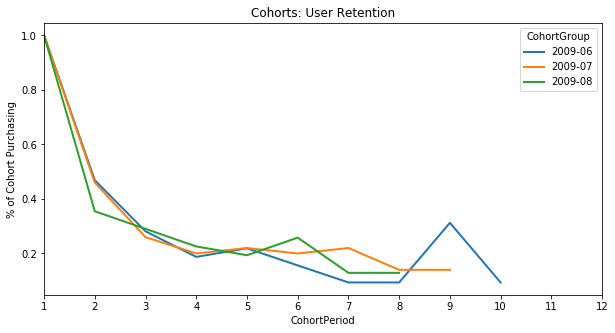

In [13]:
user_retention[['2009-06', '2009-07', '2009-08']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

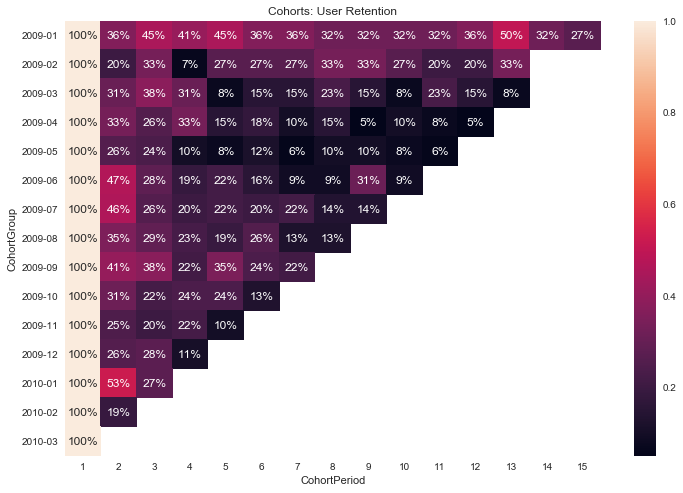

In [14]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

we can see from the above chart that fewer users tend to purchase as time goes on.

However, we can also see that the 2009-01 cohort is the strongest, which enables us to ask targeted questions about this cohort compared to others: 

what other attributes (besides first purchase month) do these users share which might be causing them to stick around? How were the majority of these users acquired? Was there a specific marketing campaign that brought them in? Did they take advantage of a promotion at sign-up? The answers to these questions would inform future marketing and product efforts.